<a href="https://colab.research.google.com/github/anikitin52/ML-Practice/blob/main/LabWork1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа по машинному обучению № 1
## Оценка максимальной зарплаты
Задача: расчитать колличественный признак - минимальную зарплату `salary_from` на основе данных из датасета с вакансиями в IT на [HeadHunter](https://hh.ru)


Импорт билиоткек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Загрузка, чтение данных

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ilyazawilsiv/it-vacancies-from-headhunter-website")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'it-vacancies-from-headhunter-website' dataset.
Path to dataset files: /kaggle/input/it-vacancies-from-headhunter-website


In [3]:
data_raw = pd.read_csv('/root/.cache/kagglehub/datasets/ilyazawilsiv/it-vacancies-from-headhunter-website/versions/1/IT_vacancies.csv')
display(data_raw.head())

,id,area_id,area_name,name,test_required,salary_to,salary_from,salary_gross,salary_currency,address_lat,...,accept_temporary,accept_handicapped,professional_roles_id,professional_roles_name,working_time_modes,driver_license_types,working_time_intervals,quick_responses_allowed,response_letter_required,accept_incomplete_resumes
0,85146733,2,Санкт-Петербург,Тестировщик / QA Engineer (Junior / Middle / S...,NaN,NaN,NaN,NaN,NaN,59.984924,...,False,True,124,Тестировщик,NaN,NaN,NaN,False,False,False
1,87391606,1,Москва,Ведущий Системный Аналитик Kleiber.Graphics,NaN,250000.0,230000.0,False,RUR,NaN,...,False,False,148,Системный аналитик,NaN,NaN,NaN,False,False,False
2,85896506,79,Саратов,Бизнес-аналитик,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,10,Аналитик,NaN,NaN,NaN,False,False,False
3,86876446,72,Пермь,Менеджер проектов/Аккаунт-менеджер (IT сфера) ...,NaN,NaN,NaN,NaN,NaN,58.004460,...,False,False,107,Руководитель проектов,NaN,NaN,NaN,False,False,False
4,84560508,76,Ростов-на-Дону,"Специалист службы поддержки (удаленно), Ростов...",NaN,NaN,35000.0,True,RUR,NaN,...,False,False,121,Специалист технической поддержки,NaN,NaN,NaN,False,False,False


In [4]:
data_raw.shape

(68770, 54)

In [5]:
data_raw.head(10)

,id,area_id,area_name,name,test_required,salary_to,salary_from,salary_gross,salary_currency,address_lat,...,accept_temporary,accept_handicapped,professional_roles_id,professional_roles_name,working_time_modes,driver_license_types,working_time_intervals,quick_responses_allowed,response_letter_required,accept_incomplete_resumes
0,85146733,2,Санкт-Петербург,Тестировщик / QA Engineer (Junior / Middle / S...,NaN,NaN,NaN,NaN,NaN,59.984924,...,False,True,124,Тестировщик,NaN,NaN,NaN,False,False,False
1,87391606,1,Москва,Ведущий Системный Аналитик Kleiber.Graphics,NaN,250000.0,230000.0,False,RUR,NaN,...,False,False,148,Системный аналитик,NaN,NaN,NaN,False,False,False
2,85896506,79,Саратов,Бизнес-аналитик,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,10,Аналитик,NaN,NaN,NaN,False,False,False
3,86876446,72,Пермь,Менеджер проектов/Аккаунт-менеджер (IT сфера) ...,NaN,NaN,NaN,NaN,NaN,58.004460,...,False,False,107,Руководитель проектов,NaN,NaN,NaN,False,False,False
4,84560508,76,Ростов-на-Дону,"Специалист службы поддержки (удаленно), Ростов...",NaN,NaN,35000.0,True,RUR,NaN,...,False,False,121,Специалист технической поддержки,NaN,NaN,NaN,False,False,False
5,87670377,1,Москва,Программист 1С (1С УТ 11.5 и УТ 10.3),NaN,250000.0,NaN,False,RUR,55.608830,...,False,False,96,"Программист, разработчик",NaN,NaN,NaN,False,False,False
6,86837870,1,Москва,Тестировщик сайтов / помощник SEO специалиста,NaN,60000.0,NaN,False,RUR,55.769024,...,False,False,124,Тестировщик,NaN,NaN,NaN,False,False,False
7,85871645,53,Краснодар,Менеджер по сопровождению клиентов,NaN,60000.0,40000.0,False,RUR,45.034782,...,False,False,121,Специалист технической поддержки,NaN,NaN,NaN,False,False,False
8,87389509,1,Москва,Младший системный администратор,NaN,80000.0,NaN,True,RUR,55.746964,...,True,False,113,Системный администратор,NaN,NaN,NaN,False,False,False
9,88085530,1,Москва,Руководитель отдела программирования (Reverse ...,NaN,NaN,250000.0,False,RUR,NaN,...,False,False,96,"Программист, разработчик",NaN,NaN,NaN,False,False,False


In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68770 entries, 0 to 68769
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         68770 non-null  int64  
 1   area_id                    68770 non-null  int64  
 2   area_name                  68770 non-null  object 
 3   name                       68770 non-null  object 
 4   test_required              1916 non-null   object 
 5   salary_to                  17548 non-null  float64
 6   salary_from                26782 non-null  float64
 7   salary_gross               30404 non-null  object 
 8   salary_currency            30410 non-null  object 
 9   address_lat                34853 non-null  float64
 10  address_lng                34853 non-null  float64
 11  address_raw                35582 non-null  object 
 12  address_city               34593 non-null  object 
 13  metro_line_id              16673 non-null  flo

In [7]:
data_raw.isnull().sum()

,0
id,0
area_id,0
area_name,0
name,0
test_required,66854
salary_to,51222
salary_from,41988
salary_gross,38366
salary_currency,38360
address_lat,33917


Визуализация данных

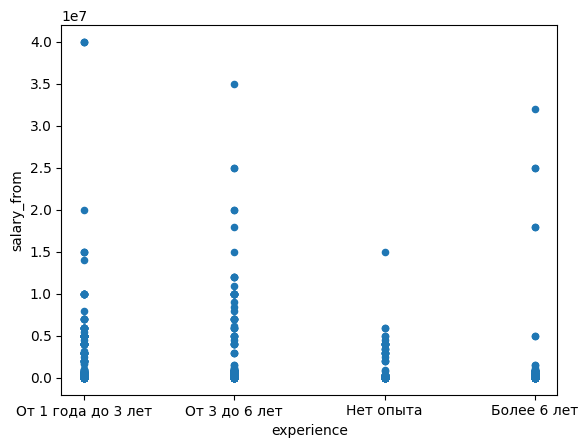

In [8]:
data_raw.plot(kind='scatter', x='experience', y='salary_from')
pass

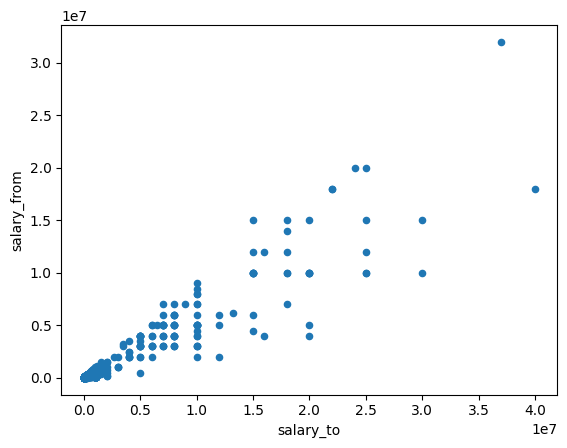

In [9]:
data_raw.plot(kind='scatter', x='salary_to', y='salary_from')
pass

In [10]:
data_raw['salary_from'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,salary_from
0.005,800.0
0.010,1200.0
0.050,20000.0
0.100,30000.0
0.500,70000.0
0.900,200000.0
0.950,250000.0
0.990,600000.0
0.995,4000000.0


In [11]:
data_raw['salary_to'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,salary_to
0.005,1173.5
0.010,1650.0
0.050,30000.0
0.100,40000.0
0.500,90000.0
0.900,300000.0
0.950,370000.0
0.990,1100000.0
0.995,7000000.0


Есть как сильно завышенная зарплата, так и сильно заниженная. Но в датасете указана зарплата в разных валютах.

In [12]:
print(data_raw['salary_currency'].unique())

[nan 'RUR' 'BYR' 'KZT' 'UZS' 'USD' 'EUR' 'KGS' 'AZN' 'GEL']


In [13]:
non_rub_salaries = data_raw[(data_raw['salary_currency'] != 'RUR') & (data_raw['salary_currency'].notna())]
print(f"Количество строк с валютой зарплаты не в рублях и не NaN: {non_rub_salaries.shape[0]}")

Количество строк с валютой зарплаты не в рублях и не NaN: 2268


In [14]:
print(data_raw['salary_currency'].value_counts())

salary_currency
RUR    28142
KZT     1025
USD      503
BYR      377
UZS      189
EUR       95
KGS       75
AZN        2
GEL        2
Name: count, dtype: int64


Переводим зарплату в рубли по курсу на 17.10.2023 (дата сбора данных о вакансях). Курс валют взят с сайта https://cbr.ru/currency_base/dynamics/

In [15]:
def convert_to_rub(row, conversion_rates):
    if row['salary_currency'] == 'RUR':
        return row['salary_from']
    elif row['salary_currency'] in conversion_rates:
        return row['salary_from'] * conversion_rates[row['salary_currency']]
    else:
        return np.nan

def convert_to_rub_to(row, conversion_rates):
    if row['salary_currency'] == 'RUR':
        return row['salary_to']
    elif row['salary_currency'] in conversion_rates:
        return row['salary_to'] * conversion_rates[row['salary_currency']]
    else:
        return np.nan

conversion_rates = {
    'BYR': 29.5138,
    'KZT': 0.203963,
    'UZS': 0.00796265,
    'USD': 97.2865,
    'EUR': 102.52,
    'KGS': 1.09088,
    'AZN': 57.2274,
    'GEL': 36.0534
}

data_raw['rub_salary_from'] = data_raw.apply(convert_to_rub, axis=1, conversion_rates=conversion_rates)
data_raw['rub_salary_to'] = data_raw.apply(convert_to_rub_to, axis=1, conversion_rates=conversion_rates)

display(data_raw[['salary_from', 'salary_to', 'salary_currency', 'rub_salary_from', 'rub_salary_to']].head())

,salary_from,salary_to,salary_currency,rub_salary_from,rub_salary_to
0,NaN,NaN,NaN,NaN,NaN
1,230000.0,250000.0,RUR,230000.0,250000.0
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,35000.0,NaN,RUR,35000.0,NaN


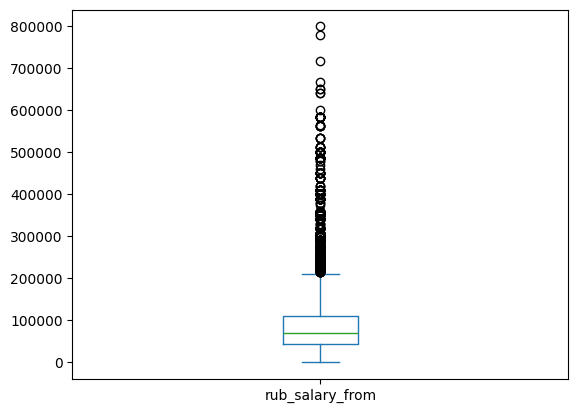

In [16]:
data_raw['rub_salary_from'].plot(kind='box')
pass

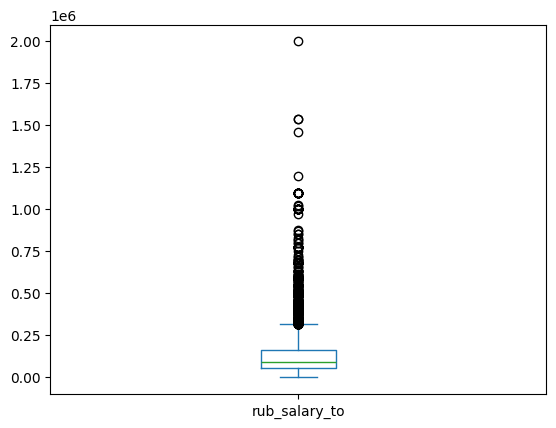

In [17]:
data_raw['rub_salary_to'].plot(kind='box')
pass

In [18]:
data_raw[data_raw['rub_salary_from'] > 650000]

,id,area_id,area_name,name,test_required,salary_to,salary_from,salary_gross,salary_currency,address_lat,...,professional_roles_id,professional_roles_name,working_time_modes,driver_license_types,working_time_intervals,quick_responses_allowed,response_letter_required,accept_incomplete_resumes,rub_salary_from,rub_salary_to
528,87603584,236,Кипр,Backend Team Lead (Core Product),NaN,7500.0,6500.0,False,EUR,NaN,...,96,"Программист, разработчик",NaN,NaN,NaN,False,False,False,666380.0,768900.0
5128,87388443,1,Москва,Senior Cyber Security Engineer,NaN,15000.0,8000.0,True,USD,NaN,...,116,Специалист по информационной безопасности,NaN,NaN,NaN,False,False,False,778292.0,1459297.5
11019,78157311,1,Москва,Chief Technology Officer/CTO,NaN,1200000.0,800000.0,False,RUR,55.749510,...,125,Технический директор (CTO),NaN,NaN,NaN,False,False,False,800000.0,1200000.0
30688,87623692,1,Москва,"Full stack C# Developer (C# JS), Кипр",NaN,NaN,7000.0,True,EUR,34.687527,...,96,"Программист, разработчик",NaN,NaN,NaN,False,False,False,717640.0,NaN


In [19]:
data_raw[data_raw['rub_salary_to'] > 1000000]

,id,area_id,area_name,name,test_required,salary_to,salary_from,salary_gross,salary_currency,address_lat,...,professional_roles_id,professional_roles_name,working_time_modes,driver_license_types,working_time_intervals,quick_responses_allowed,response_letter_required,accept_incomplete_resumes,rub_salary_from,rub_salary_to
5128,87388443,1,Москва,Senior Cyber Security Engineer,NaN,15000.0,8000.0,True,USD,NaN,...,116,Специалист по информационной безопасности,NaN,NaN,NaN,False,False,False,778292.0,1459297.5
11019,78157311,1,Москва,Chief Technology Officer/CTO,NaN,1200000.0,800000.0,False,RUR,55.74951,...,125,Технический директор (CTO),NaN,NaN,NaN,False,False,False,800000.0,1200000.0
26009,77724997,1641,Набережные Челны,Руководитель группы проектов,NaN,1100000.0,55000.0,True,RUR,NaN,...,107,Руководитель проектов,NaN,NaN,NaN,False,False,False,55000.0,1100000.0
26937,77724999,3,Екатеринбург,Руководитель группы проектов,NaN,1100000.0,55000.0,True,RUR,NaN,...,107,Руководитель проектов,NaN,NaN,NaN,False,False,False,55000.0,1100000.0
28039,77725005,104,Челябинск,Руководитель группы проектов,NaN,1100000.0,55000.0,True,RUR,NaN,...,107,Руководитель проектов,NaN,NaN,NaN,False,False,False,55000.0,1100000.0
29201,77724998,4,Новосибирск,Руководитель группы проектов,NaN,1100000.0,55000.0,True,RUR,NaN,...,107,Руководитель проектов,NaN,NaN,NaN,False,False,False,55000.0,1100000.0
31391,77725004,54,Красноярск,Руководитель группы проектов,NaN,1100000.0,55000.0,True,RUR,NaN,...,107,Руководитель проектов,NaN,NaN,NaN,False,False,False,55000.0,1100000.0
33264,77724994,1,Москва,Руководитель группы проектов,NaN,1100000.0,55000.0,True,RUR,NaN,...,107,Руководитель проектов,NaN,NaN,NaN,False,False,False,55000.0,1100000.0
34243,77724996,88,Казань,Руководитель группы проектов,NaN,1100000.0,55000.0,True,RUR,NaN,...,107,Руководитель проектов,NaN,NaN,NaN,False,False,False,55000.0,1100000.0
34687,77725010,96,Ижевск,Руководитель группы проектов,NaN,1100000.0,55000.0,True,RUR,NaN,...,107,Руководитель проектов,NaN,NaN,NaN,False,False,False,55000.0,1100000.0


In [20]:
rows_to_drop = data_raw[
    (data_raw['salary_from'] < data_raw['salary_from'].quantile(0.005)) | (data_raw['salary_from'] > data_raw['salary_from'].quantile(0.95)) |
    (data_raw['salary_to']  < data_raw['salary_to'].quantile(0.005)) | (data_raw['salary_to']  > data_raw['salary_to'].quantile(0.95))].index
data = data_raw.drop(rows_to_drop)
data.shape

(67128, 56)

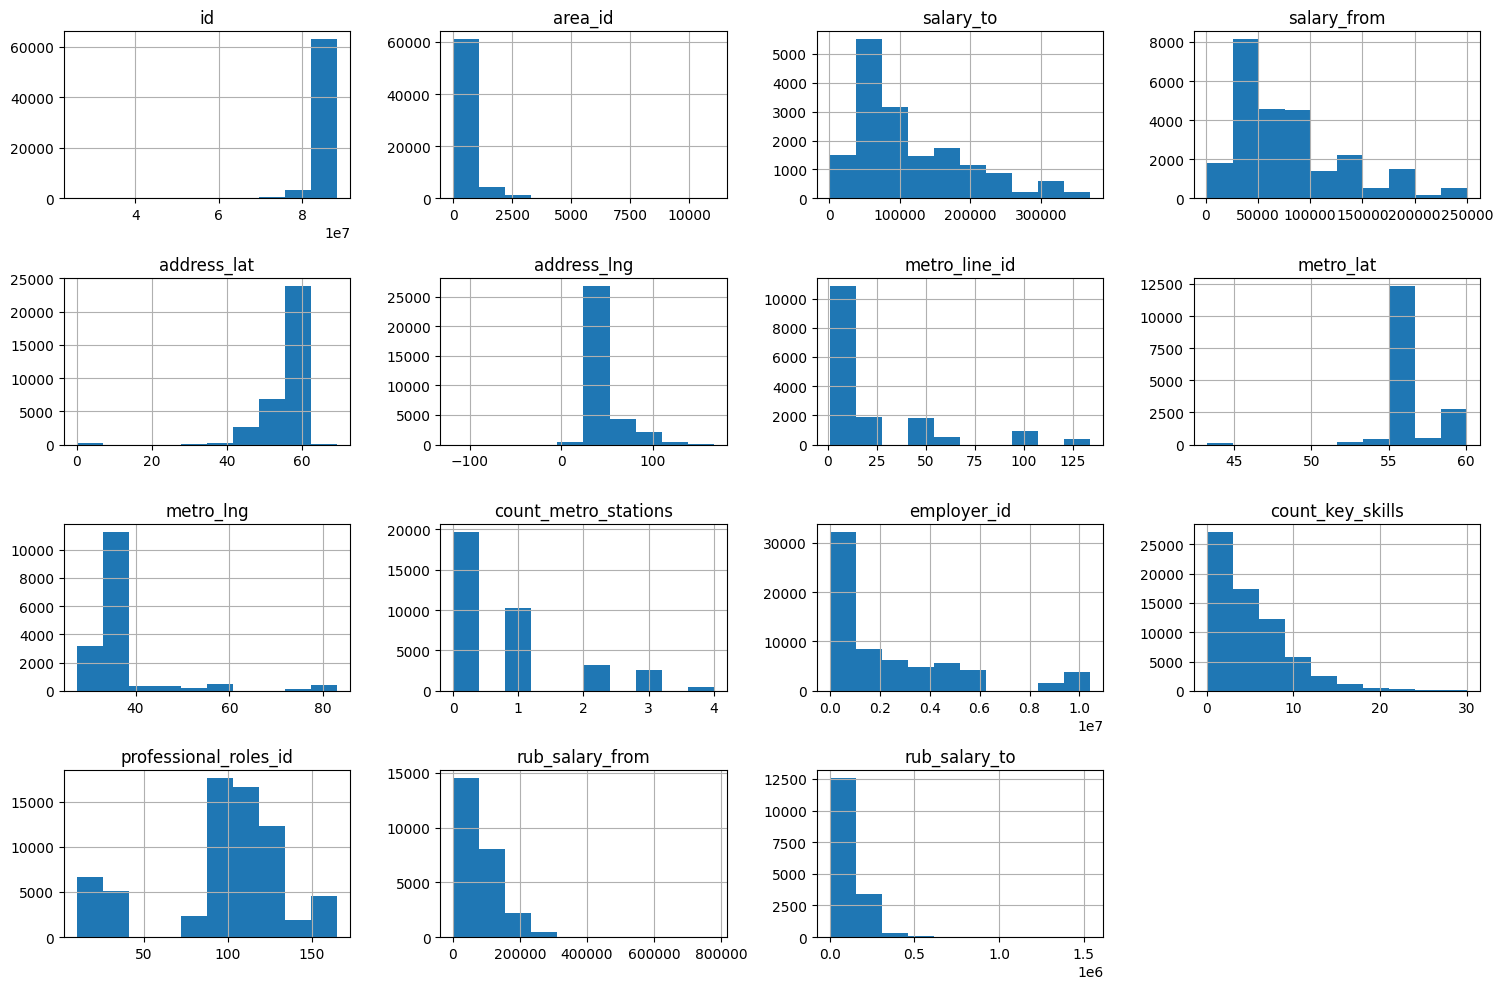

In [21]:
data.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [22]:
data.describe()

,id,area_id,salary_to,salary_from,address_lat,address_lng,metro_line_id,metro_lat,metro_lng,count_metro_stations,employer_id,count_key_skills,professional_roles_id,rub_salary_from,rub_salary_to
count,6.712800e+04,67128.000000,16453.000000,25354.000000,34147.000000,34147.000000,16442.000000,16442.000000,16442.000000,36122.000000,6.704200e+04,67128.000000,67128.000000,25354.000000,1.645300e+04
mean,8.642095e+07,239.309185,113003.192488,82219.893468,54.587018,44.786748,21.592264,56.315804,38.895808,0.727092,2.340400e+06,4.392549,95.923489,84705.361228,1.173376e+05
std,3.475563e+06,681.776344,79308.496106,54682.284885,6.229760,18.398993,30.316979,2.050052,9.953838,0.985536,2.823895e+06,4.593437,39.378554,59276.756530,9.046767e+04
min,2.597870e+07,1.000000,1200.000000,800.000000,0.000000,-117.780920,1.000000,43.216390,27.437557,0.000000,6.000000e+00,0.000000,10.000000,850.000000,1.200000e+03
25%,8.644762e+07,1.000000,52000.000000,43000.000000,54.987812,37.519863,3.000000,55.726547,37.487514,0.000000,4.785800e+04,0.000000,96.000000,43000.000000,5.200000e+04
50%,8.740880e+07,2.000000,85000.000000,65000.000000,55.749450,37.648530,9.000000,55.768307,37.582108,0.000000,1.141784e+06,4.000000,107.000000,66000.000000,8.500000e+04
75%,8.791501e+07,78.000000,150000.000000,100000.000000,56.047049,48.564892,17.000000,55.847220,37.659040,1.000000,3.843905e+06,7.000000,121.000000,100000.000000,1.500000e+05
max,8.830466e+07,11049.000000,370000.000000,250000.000000,69.404570,166.459240,134.000000,60.066990,82.976040,4.000000,1.043802e+07,30.000000,165.000000,778292.000000,1.537800e+06


In [23]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].astype('category')

display(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 67128 entries, 0 to 68769
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   id                         67128 non-null  int64   
 1   area_id                    67128 non-null  int64   
 2   area_name                  67128 non-null  category
 3   name                       67128 non-null  category
 4   test_required              1893 non-null   category
 5   salary_to                  16453 non-null  float64 
 6   salary_from                25354 non-null  float64 
 7   salary_gross               28762 non-null  category
 8   salary_currency            28768 non-null  category
 9   address_lat                34147 non-null  float64 
 10  address_lng                34147 non-null  float64 
 11  address_raw                34872 non-null  category
 12  address_city               33887 non-null  category
 13  metro_line_id              16442 non

None

In [24]:
data.describe(include=['category'])

,area_name,name,test_required,salary_gross,salary_currency,address_raw,address_city,metro_line_name,metro_station_name,address_street,...,employment,experience,key_skills,description,billing_type,working_days,professional_roles_name,working_time_modes,driver_license_types,working_time_intervals
count,67128,67128,1893,28762,28768,34872,33887,16442,16442,33010,...,67128,67128,44574,67128,67128,308,67128,809,102,1628
unique,1113,33403,2,2,7,14811,1088,33,388,5684,...,5,4,35595,58831,4,1,25,1,2,1
top,Москва,Системный администратор,True,False,RUR,"Москва, Кутузовский проспект, 32к1",Москва,Замоскворецкая,Павелецкая,Пресненская набережная,...,Полная занятость,От 1 года до 3 лет,"{""Работа в команде"",Клиентоориентированность,""...","<p><strong>Привет, будущий коллега!</strong></...",Стандарт,Работа только по сб и вс,"Программист, разработчик",Можно начинать работать после 16:00,{B},Можно работать сменами по 4–6 часов в день
freq,27794,2112,1206,19477,27352,161,13292,2314,366,500,...,64370,33263,374,293,55853,308,17622,809,101,1628


<Axes: xlabel='experience', ylabel='rub_salary_from'>

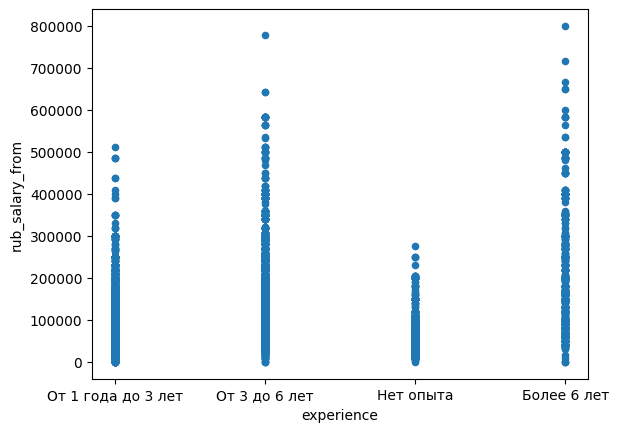

In [25]:
data_raw.plot(kind='scatter', x='experience', y='rub_salary_from')

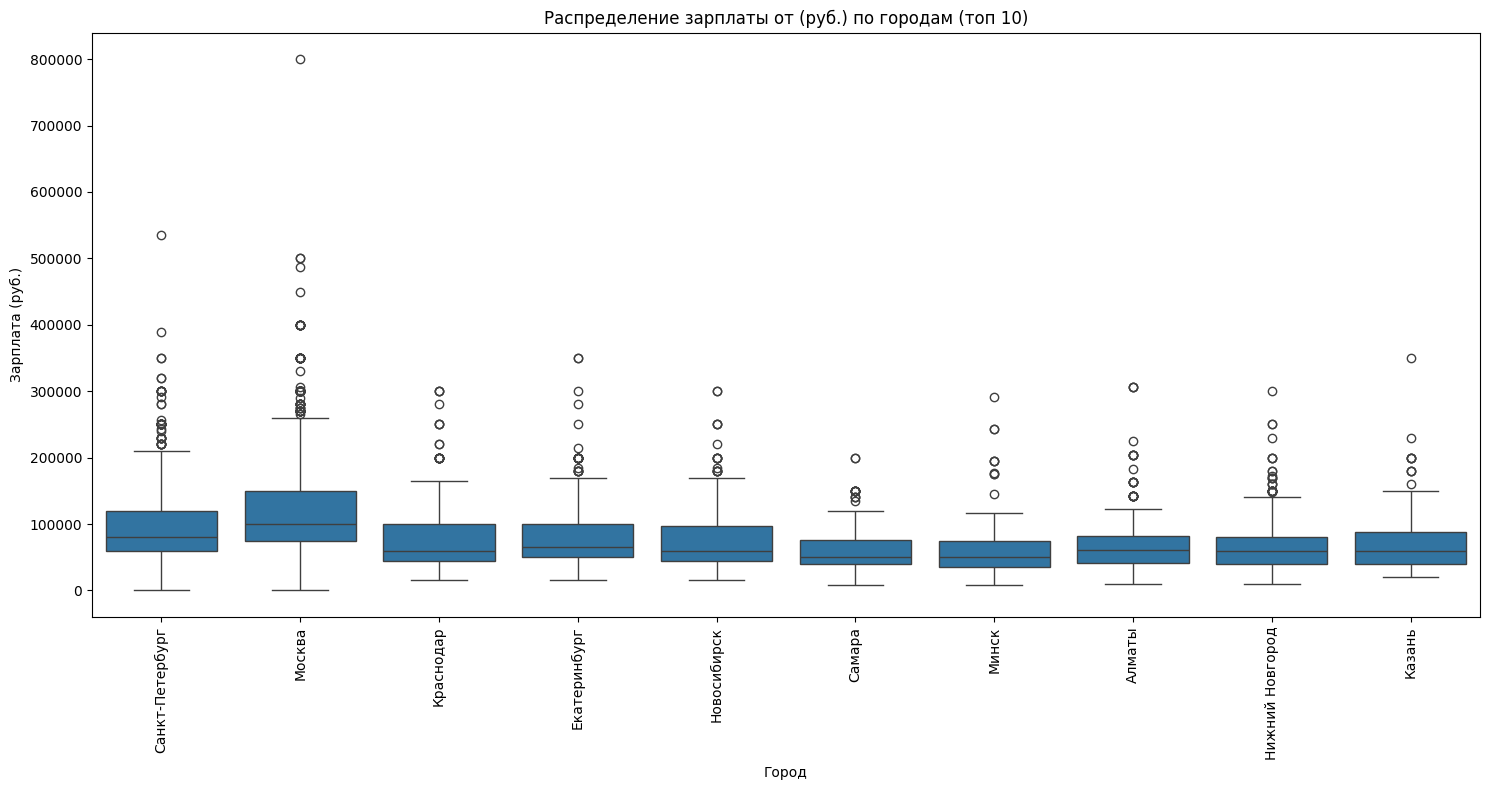

In [26]:
top_cities = data_raw['address_city'].value_counts().nlargest(10).index

data_top_cities = data_raw[data_raw['address_city'].isin(top_cities)]

plt.figure(figsize=(15, 8))
sns.boxplot(x='address_city', y='rub_salary_from', data=data_top_cities)
plt.xticks(rotation=90)
plt.title('Распределение зарплаты от (руб.) по городам (топ 10)')
plt.xlabel('Город')
plt.ylabel('Зарплата (руб.)')
plt.tight_layout()
plt.show()

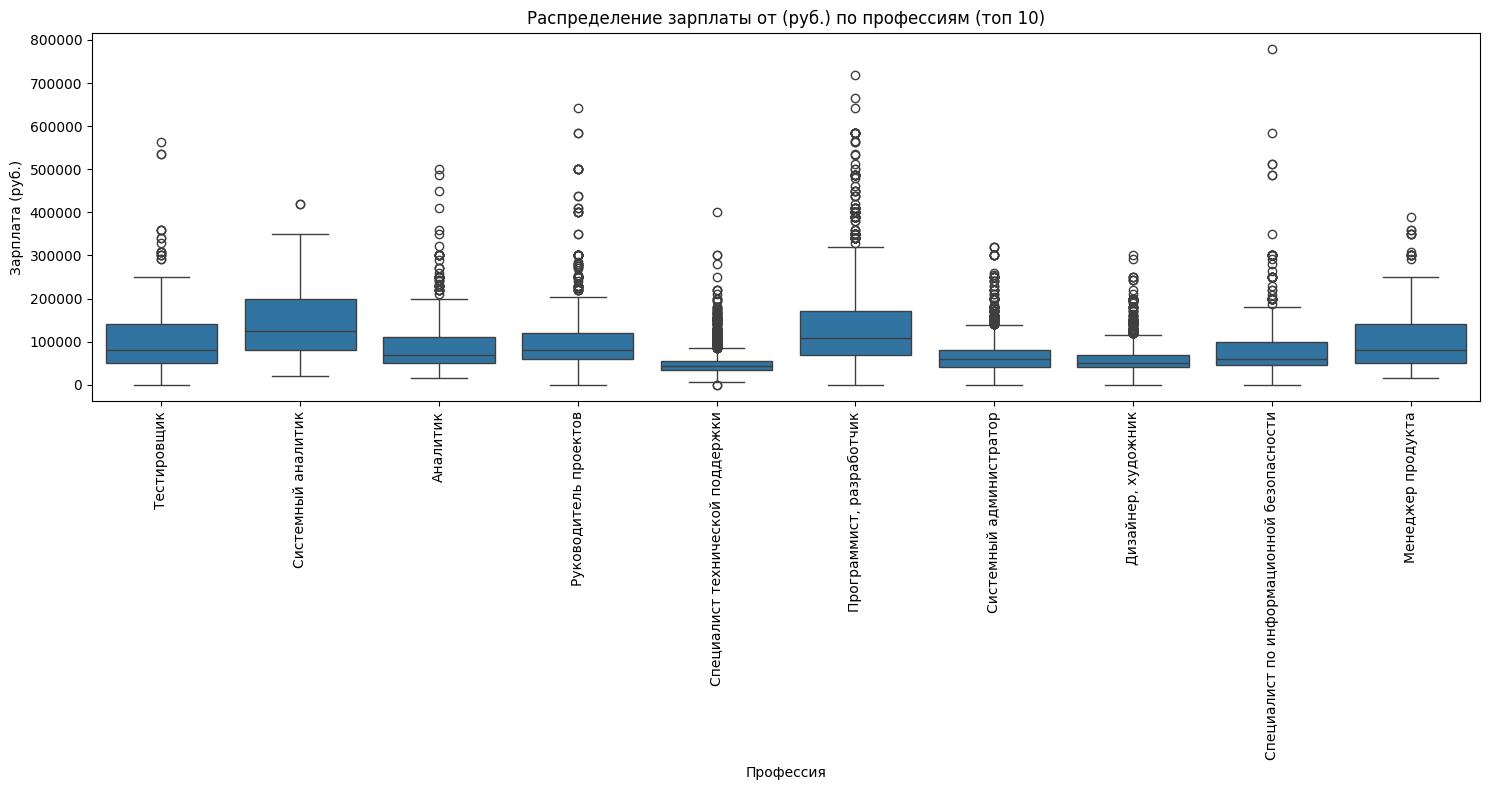

In [27]:
top_professions = data_raw['professional_roles_name'].value_counts().nlargest(10).index

data_top_professions = data_raw[data_raw['professional_roles_name'].isin(top_professions)]

plt.figure(figsize=(15, 8))
sns.boxplot(x='professional_roles_name', y='rub_salary_from', data=data_top_professions)
plt.xticks(rotation=90)
plt.title('Распределение зарплаты от (руб.) по профессиям (топ 10)')
plt.xlabel('Профессия')
plt.ylabel('Зарплата (руб.)')
plt.tight_layout()
plt.show()

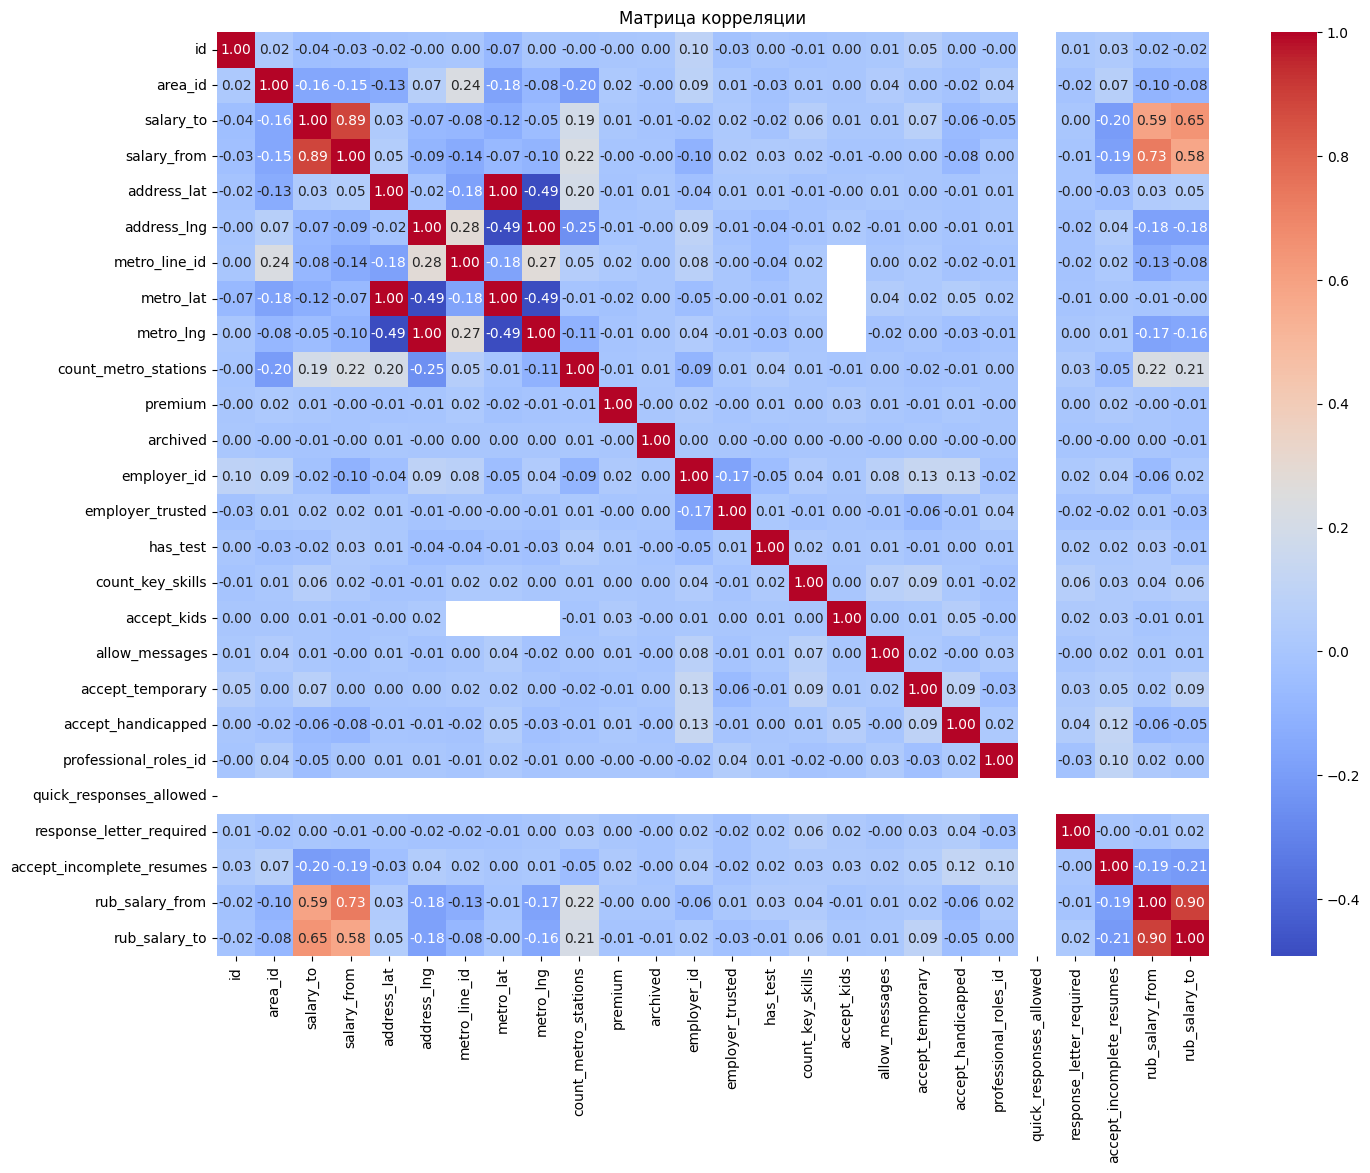

In [28]:
plt.figure(figsize=(16, 12))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции')
plt.show()



Разделяем на тестовую и обучающую выборки

In [29]:
X = data_raw.drop(['rub_salary_from', 'id', 'created_at','published_at', 'initial_created_at', 'archived', 'area_name', 'salary_to', 'salary_currency'], axis=1)
y = data_raw['rub_salary_from']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(51577, 17193)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(51577, 17193)

Работа с пропущенными значениями

In [32]:
data.isnull().sum()

,0
id,0
area_id,0
area_name,0
name,0
test_required,65235
salary_to,50675
salary_from,41774
salary_gross,38366
salary_currency,38360
address_lat,32981


In [33]:



# Замена metro_{something} на bool has_metro. Если не пусто true
metro_cols = ['metro_line_id', 'metro_line_name', 'metro_station_name', 'metro_lat', 'metro_lng', 'metro_stations']
# Filter metro_cols to only include columns present in X_train
metro_cols_actual = [col for col in metro_cols if col in X_train.columns]


X_train['has_metro'] = X_train[metro_cols_actual].notna().any(axis=1)
X_test['has_metro'] = X_test[metro_cols_actual].notna().any(axis=1)
X_train = X_train.drop(columns=metro_cols_actual)
X_test = X_test.drop(columns=metro_cols_actual)


# Заполнение пропущенных значений в count_metro_stations если пусто то 0
X_train['count_metro_stations'] = X_train['count_metro_stations'].fillna(0)
X_test['count_metro_stations'] = X_test['count_metro_stations'].fillna(0)

# Заполнение пропущенных значений в employer_id модой из обучающей выборки
employer_id_mode = X_train['employer_id'].mode()[0] if not X_train['employer_id'].mode().empty else None
X_train['employer_id'] = X_train['employer_id'].fillna(employer_id_mode)
X_test['employer_id'] = X_test['employer_id'].fillna(employer_id_mode)


# Заполнение пропущенных значений в accredited_it_employer на False
X_train['accredited_it_employer'] = X_train['accredited_it_employer'].fillna(False)
X_test['accredited_it_employer'] = X_test['accredited_it_employer'].fillna(False)

# Заполнение пропущенных значений в salary_to, salary_from, rub_salary_to, средним по профессии из обучающей выборки
for col in [ 'salary_from', 'rub_salary_to']:
    mean_salary_by_profession = X_train.groupby('professional_roles_name')[col].transform('mean')
    X_train[col] = X_train[col].fillna(mean_salary_by_profession)
    # Для тестовой выборки используйте средние значения, рассчитанные на обучающей выборке
    mean_salary_by_profession_test = X_test.groupby('professional_roles_name')[col].transform('mean') # Вычислить средние значения для тестовой выборки для профессий, присутствующих в тестовой выборке, но не в обучающей
    X_test[col] = X_test[col].fillna(mean_salary_by_profession_test)
    # Обработка любых оставшихся значений NaN в тестовой выборке, если профессия была только в тестовой выборке
    overall_mean_salary = X_train[col].mean()
    X_test[col] = X_test[col].fillna(overall_mean_salary)



# Заполнение пропущенных значений в address_lat, address_lng, address_city средним по area_id из обучающей выборки
for col in ['address_lat', 'address_lng', 'address_city']:
    if col in X_train.columns and X_train[col].dtype in ['float64', 'int64']:
        mean_by_area = X_train.groupby('area_id')[col].transform('mean')
        X_train[col] = X_train[col].fillna(mean_by_area)
        overall_mean = X_train[col].mean()
        X_train[col] = X_train[col].fillna(overall_mean)

        # Для тестовой выборки используйте средние значения, рассчитанные на обучающей выборке
        mean_by_area_test = X_test.groupby('area_id')[col].transform('mean') # Вычислить средние значения для тестовой выборки для областей, присутствующих в тестовой выборке, но не в обучающей
        X_test[col] = X_test[col].fillna(mean_by_area_test)
        # Обработка любых оставшихся значений NaN в тестовой выборке, если область была только в тестовой выборке
        X_test[col] = X_test[col].fillna(overall_mean)

    elif col in X_train.columns:
        # Для категориальных/объектных типов, таких как address_city, используйте моду из обучающей выборки
        mode_by_area = X_train.groupby('area_id')[col].transform(lambda x: x.mode()[0] if not x.mode().empty else None)
        X_train[col] = X_train[col].fillna(mode_by_area)
        overall_mode = X_train[col].mode()[0] if not X_train[col].mode().empty else None
        X_train[col] = X_train[col].fillna(overall_mode)

        # Для тестовой выборки используйте моды, рассчитанные на обучающей выборке
        mode_by_area_test = X_test.groupby('area_id')[col].transform(lambda x: x.mode()[0] if not x.mode().empty else None) # Вычислить моды для тестовой выборки для областей, присутствующих в тестовой выборке, но не в обучающей
        X_test[col] = X_test[col].fillna(mode_by_area_test)
        # Обработка любых оставшихся значений NaN в тестовой выборке, если область была только в тестовой выборке
        X_test[col] = X_test[col].fillna(overall_mode)


# Заполнение пропущенных значений в key_skills пустым списком
X_train['key_skills'] = X_train['key_skills'].astype(object).fillna('[]')
X_test['key_skills'] = X_test['key_skills'].astype(object).fillna('[]')


display(X_train.isnull().sum())
display(X_test.isnull().sum())



/tmp/ipython-input-1862653420.py:24: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['accredited_it_employer'] = X_train['accredited_it_employer'].fillna(False)
/tmp/ipython-input-1862653420.py:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test['accredited_it_employer'] = X_test['accredited_it_employer'].fillna(False)


,0
area_id,0
name,0
test_required,50149
salary_from,0
salary_gross,28744
address_lat,0
address_lng,0
address_raw,24867
address_city,0
address_street,26294


,0
area_id,0
name,0
test_required,16705
salary_from,0
salary_gross,9622
address_lat,0
address_lng,0
address_raw,8321
address_city,0
address_street,8792


Обработка категориальных признаков

In [34]:
# Преобразование столбцов типа object в category
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = X_train[col].astype('category')
for col in X_test.columns:
    if X_test[col].dtype == 'object':
        X_test[col] = X_test[col].astype('category')

In [35]:
categorical_features = X_train.select_dtypes(include=['category']).columns.tolist()
print("Список категориальных признаков:")
print(categorical_features)

Список категориальных признаков:
['name', 'test_required', 'salary_gross', 'address_raw', 'address_city', 'address_street', 'address_building', 'employer_name', 'schedule', 'languages', 'department', 'employment', 'experience', 'key_skills', 'description', 'billing_type', 'working_days', 'professional_roles_name', 'working_time_modes', 'driver_license_types', 'working_time_intervals']


In [36]:
X_train['name_length'] = X_train['name'].str.len()
X_train['seniority'] = 'unknown'
X_train.loc[X_train['name'].str.contains('junior', case=False, na=False), 'seniority'] = 'junior'
X_train.loc[X_train['name'].str.contains('middle', case=False, na=False), 'seniority'] = 'middle'
X_train.loc[X_train['name'].str.contains('senior', case=False, na=False), 'seniority'] = 'senior'

X_test['name_length'] = X_test['name'].str.len()
X_test['seniority'] = 'unknown'
X_test.loc[X_test['name'].str.contains('junior', case=False, na=False), 'seniority'] = 'junior'
X_test.loc[X_test['name'].str.contains('middle', case=False, na=False), 'seniority'] = 'middle'
X_test.loc[X_test['name'].str.contains('senior', case=False, na=False), 'seniority'] = 'senior'

display(X_train[['name', 'name_length', 'seniority']].head())
display(X_test[['name', 'name_length', 'seniority']].head())

,name,name_length,seniority
22256,Управляющий (м.Проспект Ветеранов),34,unknown
33820,Ведущий разработчик 1С,22,unknown
22410,Специалист мониторинга (Антифрод),33,unknown
40341,Ведущий специалист отдела информационно-технич...,66,unknown
59132,Системный администратор,23,unknown


,name,name_length,seniority
60634,Chief Product Officer (г. Ташкент),34,unknown
110,Инженер технического отдела,27,unknown
15719,Инженер Pre-sale / Архитектор решений,37,unknown
56558,Начинающий Data Scientist (Computer Vision),43,unknown
2707,Системный аналитик,18,unknown


In [37]:
import json
from sklearn.preprocessing import LabelEncoder

# Drop key_skills and description columns
X_train = X_train.drop(columns=['key_skills', 'description'])
X_test = X_test.drop(columns=['key_skills', 'description'])

# One-Hot Encoding for 'billing_type'
X_train = pd.get_dummies(X_train, columns=['billing_type'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['billing_type'], drop_first=True)

# Label Encoding for 'professional_roles_name'
le = LabelEncoder()
X_train['professional_roles_name_encoded'] = le.fit_transform(X_train['professional_roles_name'])
X_test['professional_roles_name_encoded'] = le.transform(X_test['professional_roles_name'])
X_train = X_train.drop(columns=['professional_roles_name'])
X_test = X_test.drop(columns=['professional_roles_name'])

display(X_train.head())
display(X_test.head())

,area_id,name,test_required,salary_from,salary_gross,address_lat,address_lng,address_raw,address_city,address_street,...,response_letter_required,accept_incomplete_resumes,rub_salary_to,has_metro,name_length,seniority,billing_type_Премиум,billing_type_Стандарт,billing_type_Стандарт плюс,professional_roles_name_encoded
22256,2,Управляющий (м.Проспект Ветеранов),NaN,95000.00000,False,58.934268,30.232260,NaN,Санкт-Петербург,NaN,...,False,False,95000.000000,True,34,unknown,False,True,False,23
33820,1,Ведущий разработчик 1С,NaN,180136.93730,NaN,55.265880,37.399391,NaN,Москва,NaN,...,False,False,191742.645730,False,22,unknown,False,True,False,11
22410,1550,Специалист мониторинга (Антифрод),NaN,40000.00000,False,45.981435,37.897747,NaN,Таганрог,NaN,...,False,False,50000.000000,False,33,unknown,False,True,False,21
40341,49,Ведущий специалист отдела информационно-технич...,NaN,94411.41286,NaN,58.620213,49.600400,"Киров, Луганская улица, 51",Киров,Луганская улица,...,False,False,113312.906561,False,66,unknown,False,True,False,20
59132,72,Системный администратор,NaN,60000.00000,False,58.003586,56.211945,"Пермь, Екатерининская улица, 165",Пермь,Екатерининская улица,...,False,False,100000.000000,False,23,unknown,False,True,False,17


,area_id,name,test_required,salary_from,salary_gross,address_lat,address_lng,address_raw,address_city,address_street,...,response_letter_required,accept_incomplete_resumes,rub_salary_to,has_metro,name_length,seniority,billing_type_Премиум,billing_type_Стандарт,billing_type_Стандарт плюс,professional_roles_name_encoded
60634,1,Chief Product Officer (г. Ташкент),NaN,274610.989011,NaN,55.334256,37.383206,NaN,Москва,NaN,...,False,False,154012.204717,False,34,unknown,False,True,False,9
110,4,Инженер технического отдела,NaN,96657.625000,NaN,55.049416,82.973755,"Новосибирск, Комбинатский переулок, 3Е",Новосибирск,Комбинатский переулок,...,False,False,138147.643689,True,27,unknown,False,False,True,22
15719,1,Инженер Pre-sale / Архитектор решений,NaN,150000.000000,False,55.334256,37.383206,NaN,Москва,NaN,...,True,False,250000.000000,False,37,unknown,False,False,True,19
56558,11,Начинающий Data Scientist (Computer Vision),NaN,40000.000000,False,53.346044,83.722986,NaN,Барнаул,NaN,...,False,False,646633.600000,False,43,unknown,False,True,False,6
2707,1,Системный аналитик,NaN,144651.764706,True,55.751380,37.596670,"Москва, улица Арбат, 10",Москва,улица Арбат,...,False,False,250000.000000,False,18,unknown,False,False,True,18


In [38]:
# Удалить все столбцы типа object и category
cols_to_drop_types = X_train.select_dtypes(include=['object', 'category']).columns
X_train = X_train.drop(columns=cols_to_drop_types)
X_test = X_test.drop(columns=cols_to_drop_types)

nan_in_y_train = y_train.isnull()
X_train = X_train[~nan_in_y_train]
y_train = y_train[~nan_in_y_train]

display(X_train.head())
display(X_test.head())

,area_id,salary_from,address_lat,address_lng,count_metro_stations,premium,employer_id,employer_trusted,accredited_it_employer,has_test,...,quick_responses_allowed,response_letter_required,accept_incomplete_resumes,rub_salary_to,has_metro,name_length,billing_type_Премиум,billing_type_Стандарт,billing_type_Стандарт плюс,professional_roles_name_encoded
22256,2,95000.0,58.934268,30.232260,1.0,False,3958296.0,True,False,False,...,False,False,False,95000.000000,True,34,False,True,False,23
22410,1550,40000.0,45.981435,37.897747,0.0,False,2180.0,True,False,False,...,False,False,False,50000.000000,False,33,False,True,False,21
59132,72,60000.0,58.003586,56.211945,0.0,False,3101919.0,True,False,False,...,False,False,False,100000.000000,False,23,False,True,False,17
21758,66,50000.0,56.167508,43.827590,0.0,False,4207412.0,False,False,False,...,False,False,False,70000.000000,False,23,False,False,True,17
7362,2,50000.0,58.934268,30.232260,0.0,False,10387784.0,False,False,False,...,False,False,False,85499.169009,False,19,False,False,True,7


,area_id,salary_from,address_lat,address_lng,count_metro_stations,premium,employer_id,employer_trusted,accredited_it_employer,has_test,...,quick_responses_allowed,response_letter_required,accept_incomplete_resumes,rub_salary_to,has_metro,name_length,billing_type_Премиум,billing_type_Стандарт,billing_type_Стандарт плюс,professional_roles_name_encoded
60634,1,274610.989011,55.334256,37.383206,0.0,False,3807759.0,True,False,False,...,False,False,False,154012.204717,False,34,False,True,False,9
110,4,96657.625000,55.049416,82.973755,1.0,False,1058405.0,True,False,False,...,False,False,False,138147.643689,True,27,False,False,True,22
15719,1,150000.000000,55.334256,37.383206,0.0,False,5125586.0,True,True,False,...,False,True,False,250000.000000,False,37,False,False,True,19
56558,11,40000.000000,53.346044,83.722986,0.0,False,4177614.0,True,False,False,...,False,False,False,646633.600000,False,43,False,True,False,6
2707,1,144651.764706,55.751380,37.596670,0.0,False,2996061.0,True,False,False,...,False,False,False,250000.000000,False,18,False,False,True,18


Нормализация не нужна, т.к. мы будем использовать Random Forest.
Этот метод оптимален для данной задачи по следующим причинам:
1. Устойчивость к шуму и выбросам - в зарплатах много аномалий (потолок зарплат высокий, выбросы в бОльшую сторону нормальны, так как есть вакансии Senior разработчиков, топ-менеджеров)
2. Не требует нормализации - работает с исходными данными
3. Автоматический отбор признаков - игнорирует неинформативные
4. Улавливает нелинейные зависимости - зарплата зависит от комбинации факторов
5.Хорошая интерпретируемость - можно анализировать важность признаков

Обучение модели

In [39]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,              # уменьшить глубину
    min_samples_split=20,      # увеличить минимальное разделение
    min_samples_leaf=10,       # увеличить минимальный лист
    max_features=0.5,          # использовать только 50% признаков
    random_state=42
)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=0.5, min_samples_leaf=10,
                      min_samples_split=20, n_estimators=200, random_state=42)

In [40]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

# Handle potential NaNs in y_test and y_test_predict
nan_mask = np.isnan(y_test) | np.isnan(y_test_predict)
y_test_cleaned = y_test[~nan_mask]
y_test_predict_cleaned = y_test_predict[~nan_mask]


RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test_cleaned,  y_test_predict_cleaned)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test_cleaned,  y_test_predict_cleaned)

In [42]:
RMSE_table = pd.DataFrame(columns=('train', 'test'))
RMSE_table.loc['Random Forest', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
Random Forest,12876.042827,13240.818752


Попробуем другой метод

In [43]:
# Для начала проведем нормализацию

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
y_train_predict = model.predict(X_train)

In [47]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Handle potential NaNs in y_test and y_test_predict
nan_mask = np.isnan(y_test) | np.isnan(y_test_predict)
y_test_cleaned = y_test[~nan_mask]
y_test_predict_cleaned = y_test_predict[~nan_mask]


MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test_cleaned,  y_test_predict_cleaned)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test_cleaned,  y_test_predict_cleaned)

MSE_train, MSE_test, R2_train, R2_test

(2552668742.220075,
 4.773721797350365e+19,
 0.45413311327119243,
 -10895126815.692232)

In [49]:
MSE_train = ((y_train_predict - y_train)**2).mean()
MSE_test  = ((y_test_predict - y_test)**2).mean()

RMSE_train = (MSE_train)**(.5)
RMSE_test = (MSE_test)**(.5)

In [50]:
RMSE_table.loc['Linear Regression', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
Random Forest,12876.042827,13240.818752
"Linear Regression, all features",50523.942267,6909212543.66253


Как мы видми, линейная регрессия дает слишком большую ошибку. Проверим еше метод k ближайших соседй

In [51]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Ensure RMSE_table has the correct columns
if 'RMSE_table' not in locals() and 'RMSE_table' not in globals():
    RMSE_table = pd.DataFrame(columns=['RMSE_train', 'RMSE_test', 'R2_train', 'R2_test'])
elif not all(col in RMSE_table.columns for col in ['RMSE_train', 'RMSE_test', 'R2_train', 'R2_test']):
     RMSE_table = pd.DataFrame(columns=['RMSE_train', 'RMSE_test', 'R2_train', 'R2_test'])


# Перебор количества ближайших соседей
n_neighbors_values = [3, 5, 7, 9, 11] # Пример значений для перебора

for n in n_neighbors_values:
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(X_train, y_train)

    y_train_predict = model.predict(X_train)
    y_test_predict  = model.predict(X_test)

    # Handle potential NaNs in y_test and y_test_predict
    nan_mask = np.isnan(y_test) | np.isnan(y_test_predict)
    y_test_cleaned = y_test[~nan_mask]
    y_test_predict_cleaned = y_test_predict[~nan_mask]

    RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
    RMSE_test  = mean_squared_error(y_test_cleaned,  y_test_predict_cleaned)**.5
    R2_train = r2_score(y_train, y_train_predict)
    R2_test  = r2_score(y_test_cleaned,  y_test_predict_cleaned)

    # Добавление результатов в RMSE_table
    RMSE_table.loc[f'kNN (n={n})', :] = (RMSE_train, RMSE_test, R2_train, R2_test)

display(RMSE_table)

,RMSE_train,RMSE_test,R2_train,R2_test
kNN (n=3),34646.316875,190003.59362,0.743311,-7.239461
kNN (n=5),39352.841051,169351.949117,0.668835,-5.545692
kNN (n=7),41718.912484,157611.872952,0.627816,-4.669608
kNN (n=9),43016.930755,149122.497026,0.604295,-4.075298
kNN (n=11),44026.428286,141857.611868,0.585505,-3.592831


Самый оптимальный вариант n = 7

Test RMSE: 47,702 (минимальный среди всех)

Test R^2: 0.481 (максимальный среди всех)

Разница train/test: 5,984 (приемлемая)

Вывод. В данной работе была построена модель предсказания зарплаты для вакансии на основе датасета. Лучший результат показала изначально выбранная модель, основанная на алгоритме Random Forest. Она показала минимальную ошибку и разницу между обучающей и тестовой выборкой. Модель на основе алгоритмов линейной регрессии и метода ближайших соседей показали кратно бОльшую ошибку.